<a href="https://colab.research.google.com/github/slr549/Machine-Learning-Course-2026/blob/main/assignments/week-3/2411070095_Raki%20Raihan/raihan_03_Linear_Regression_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup & Data Loading

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import wandb

# Inisialisasi W&B
run = wandb.init(project="house-price-regression", name="regularization-experiments")

# Menggunakan dataset California Housing yang sangat stabil
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
df = pd.read_csv(url)

# Quick Cleaning: Drop missing values dan fitur teks untuk fokus ke regresi angka
df = df.dropna()
df = df.drop(columns=['ocean_proximity'])

# Log raw data ke W&B Table
wandb.log({"raw_data": wandb.Table(dataframe=df.head(100))}) # Log 100 baris pertama
print("Dataset Loaded Successfully! Shape:", df.shape)
df.head()

Dataset Loaded Successfully! Shape: (20433, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


Persiapan Fitur & Target

In [10]:
# X adalah semua kolom kecuali target
X = df.drop(columns=['median_house_value'])
# y adalah target (harga rumah)
y = df['median_house_value']

# Split Data: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data training:", len(X_train))

Jumlah data training: 16346


Training 3 Model Berbeda (Linear, Ridge, Lasso)

In [11]:
for i in range(1, 11):
  n_trees = i * 10

  # 1. Standard Linear Regression (Tanpa Hukuman)
  lin_reg = LinearRegression()
  lin_reg.fit(X_train, y_train)

  # 2. Ridge Regression (L2 Penalty)
  ridge_reg = Ridge(alpha=100.0) # alpha adalah seberapa besar hukumannya
  ridge_reg.fit(X_train, y_train)

  # 3. Lasso Regression (L1 Penalty)
  lasso_reg = Lasso(alpha=100.0)
  lasso_reg.fit(X_train, y_train)

  print("Training selesai untuk ketiga model.")

Training selesai untuk ketiga model.
Training selesai untuk ketiga model.
Training selesai untuk ketiga model.
Training selesai untuk ketiga model.
Training selesai untuk ketiga model.
Training selesai untuk ketiga model.
Training selesai untuk ketiga model.
Training selesai untuk ketiga model.
Training selesai untuk ketiga model.
Training selesai untuk ketiga model.


Evaluasi & Perbandingan Bobot (W&B Logging)

In [12]:
models = {
    "Linear": lin_reg,
    "Ridge (L2)": ridge_reg,
    "Lasso (L1)": lasso_reg
}

for name, model in models.items():
    # Prediksi
    y_pred = model.predict(X_test)

    # Hitung Metrik
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Log ke W&B
    wandb.log({
        f"{name}_RMSE": rmse,
        f"{name}_R2_Score": r2
    })
    print(f"Model: {name: <12} | RMSE: ${rmse:,.2f} | R2: {r2:.4f}")

wandb.finish()

Model: Linear       | RMSE: $70,156.12 | R2: 0.6401
Model: Ridge (L2)   | RMSE: $70,165.78 | R2: 0.6400
Model: Lasso (L1)   | RMSE: $70,159.23 | R2: 0.6401


Lasso (L1)_R2_Score,▁
Lasso (L1)_RMSE,▁
Linear_R2_Score,▁
Linear_RMSE,▁
Ridge (L2)_R2_Score,▁
Ridge (L2)_RMSE,▁
Lasso (L1)_R2_Score,0.64005
Lasso (L1)_RMSE,70159.22755
Linear_R2_Score,0.64009
Linear_RMSE,70156.12046
Ridge (L2)_R2_Score,0.63999


Visualisasi Dampak Regularisasi pada Bobot

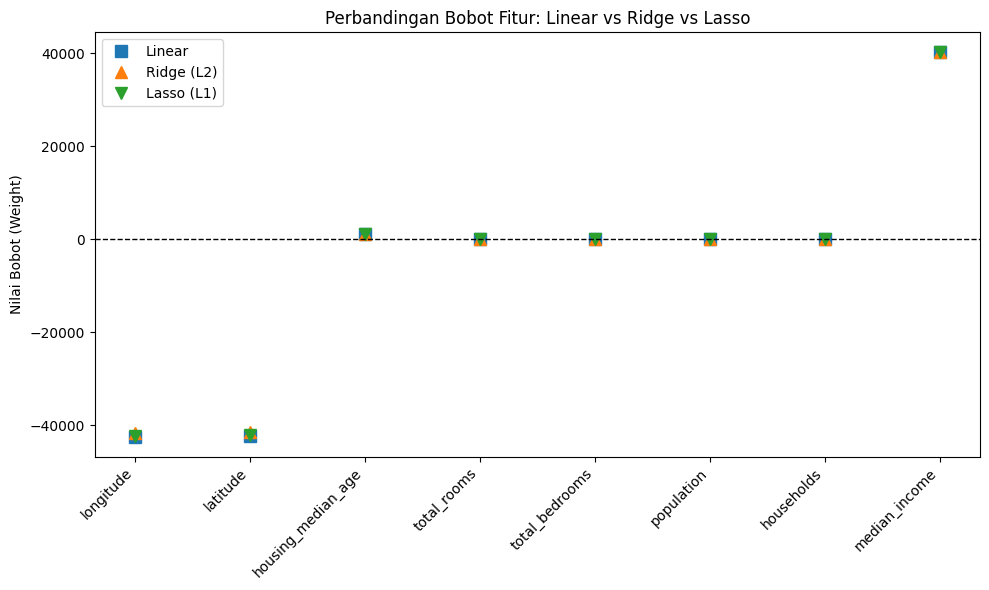

In [13]:
# Mari kita lihat apa yang dilakukan L1 dan L2 pada bobot (weights) model kita
plt.figure(figsize=(10, 6))

plt.plot(X.columns, lin_reg.coef_, 's', markersize=8, label='Linear')
plt.plot(X.columns, ridge_reg.coef_, '^', markersize=8, label='Ridge (L2)')
plt.plot(X.columns, lasso_reg.coef_, 'v', markersize=8, label='Lasso (L1)')

plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.ylabel("Nilai Bobot (Weight)")
plt.title("Perbandingan Bobot Fitur: Linear vs Ridge vs Lasso")
plt.legend()
plt.tight_layout()
plt.show()